# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from random import uniform

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



## Generate Cities List

In [2]:
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)


# Randomly generate a list of 500 + cities. 
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()



index      613
City       613
Country    613
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Api-Key
api_key = "247a814903ee011da0db7fef0e8d69c3"

#Create a df to add all the data from the API calls.
city_columns = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
new_cities_df = pd.DataFrame(columns=city_columns)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        new_cities_df.set_value(index, "City", city_data["name"])
        new_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        new_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        new_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        new_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        new_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        new_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        new_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed i

------------------------
Proceesing: City #  1  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=hobart
City not found, skipping...
------------------------
Proceesing: City #  2  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=atuona
------------------------
Proceesing: City #  3  |  Mar del Plata AR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=mar+del+plata
------------------------
Proceesing: City #  4  |  Hamilton BM
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=hamilton
------------------------
Proceesing: City #  5  |  Kruisfontein ZA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=kruisfontein
------------------------
Proceesing: City #  6  |  Bredasdorp ZA
http://api.openweather

------------------------
Proceesing: City #  48  |  Bonham US
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bonham
------------------------
Proceesing: City #  49  |  Marrakesh MA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=marrakesh
------------------------
Proceesing: City #  50  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  51  |  Pucallpa PE
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=pucallpa
------------------------
Proceesing: City #  52  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=geraldton
------------------------
Proceesing: City #  53  |  Barsovo RU
http://api.openweathermap.org/data/2.5/weather?appid=247a8149

------------------------
Proceesing: City #  94  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bluff
------------------------
Proceesing: City #  95  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=yellowknife
City not found, skipping...
------------------------
Proceesing: City #  96  |  Ponta do Sol BR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=ponta+do+sol
------------------------
Proceesing: City #  97  |  Quatre Cocos MU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=quatre+cocos
------------------------
Proceesing: City #  98  |  Bucerias MX
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bucerias
------------------------
Proceesing: City #  99  |  Pacific Grove US
http://

------------------------
Proceesing: City #  139  |  Tank PK
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=tank
------------------------
Proceesing: City #  140  |  Guerrero Negro MX
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=guerrero+negro
------------------------
Proceesing: City #  141  |  Vaini IN
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=vaini
------------------------
Proceesing: City #  142  |  Iralaya HN
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=iralaya
------------------------
Proceesing: City #  143  |  Port Moresby PG
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=port+moresby
------------------------
Proceesing: City #  144  |  Hovd NO
http://api.openweathermap.org/data/2.5/weather?app

------------------------
Proceesing: City #  185  |  Nhulunbuy AU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=nhulunbuy
------------------------
Proceesing: City #  186  |  Shahr-e Kord IR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=shahr-e+kord
------------------------
Proceesing: City #  187  |  Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=ahipara
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  188  |  Whitehorse CA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=whitehorse
------------------------
Proceesing: City #  189  |  Sigli ID
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=sigli
------------------------
Proceesing: City #  190  |  

------------------------
Proceesing: City #  231  |  Sangar RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=sangar
------------------------
Proceesing: City #  232  |  Caravelas BR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=caravelas
------------------------
Proceesing: City #  233  |  Aviles ES
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=aviles
------------------------
Proceesing: City #  234  |  Brokopondo SR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=brokopondo
------------------------
Proceesing: City #  235  |  Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=isangel
------------------------
Proceesing: City #  236  |  Palmer AU
http://api.openweathermap.org/data/2.5/weather?appid=247

------------------------
Proceesing: City #  279  |  Egvekinot RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=egvekinot
------------------------
Proceesing: City #  280  |  Znamenskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=znamenskoye
------------------------
Proceesing: City #  281  |  Bakchar RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bakchar
------------------------
Proceesing: City #  282  |  Mecca SA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=mecca
------------------------
Proceesing: City #  283  |  Shakawe BW
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=shakawe
------------------------
Proceesing: City #  284  |  Kangaatsiaq GL
http://api.openweathermap.org/data/2.5/weather?ap

------------------------
Proceesing: City #  325  |  Harper US
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=harper
------------------------
Proceesing: City #  326  |  Bintulu MY
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bintulu
------------------------
Proceesing: City #  327  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=vila+franca+do+campo
------------------------
Proceesing: City #  328  |  Banda Aceh ID
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=banda+aceh
------------------------
Proceesing: City #  329  |  Ketchikan US
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=ketchikan
------------------------
Proceesing: City #  330  |  Sunrise Manor US
http://api.openweathe

------------------------
Proceesing: City #  370  |  Mbamba NG
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=mbamba
------------------------
Proceesing: City #  371  |  Okhotsk RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=okhotsk
City not found, skipping...
------------------------
Proceesing: City #  372  |  Mount Gambier AU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=mount+gambier
------------------------
Proceesing: City #  373  |  Trinidad UY
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=trinidad
------------------------
Proceesing: City #  374  |  Bowen AU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=bowen
------------------------
Proceesing: City #  375  |  Tezu IN
http://api.openweathermap.or

City not found, skipping...
------------------------
Proceesing: City #  416  |  Balkhash KZ
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=balkhash
------------------------
Proceesing: City #  417  |  Dingle PH
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=dingle
------------------------
Proceesing: City #  418  |  Zanesville US
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=zanesville
------------------------
Proceesing: City #  419  |  Itarema BR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=itarema
------------------------
Proceesing: City #  420  |  Kermanshah IR
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=kermanshah
------------------------
Proceesing: City #  421  |  Dukat RS
http://api.openweatherm

------------------------
Proceesing: City #  462  |  Ekhabi RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=ekhabi
------------------------
Proceesing: City #  463  |  Marovoay MG
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=marovoay
------------------------
Proceesing: City #  464  |  Kawalu ID
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=kawalu
------------------------
Proceesing: City #  465  |  Sarishabari BD
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=sarishabari
City not found, skipping...
------------------------
Proceesing: City #  466  |  Shubarkuduk KZ
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=shubarkuduk
------------------------
Proceesing: City #  467  |  Mogadishu SO
http://api.openwe

------------------------
Proceesing: City #  509  |  Okahandja NA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=okahandja
City not found, skipping...
------------------------
Proceesing: City #  510  |  Pathein MM
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=pathein
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  511  |  Beringovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=beringovskiy
------------------------
Proceesing: City #  512  |  Grand Gaube MU
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=grand+gaube
------------------------
Proceesing: City #  513  |  Slave Lake CA
http://api.openweathermap.org/data/2.5/weather?appid=247a814903ee011da0db7fef0e8d69c3&units=IMPERIAL&q=slave+lake
-------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
new_cities_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [5]:
new_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Hobart,AU,61.61,-42.88,147.33,54,20,11.41
2,Atuona,PF,84.19,-9.8,-139.03,75,6,17.87
3,Mar del Plata,AR,52.46,-46.43,-67.52,58,86,15.48
4,Hamilton,BM,67.95,32.3,-64.78,73,20,9.17
5,Kruisfontein,ZA,59.58,-34,24.73,92,100,9.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

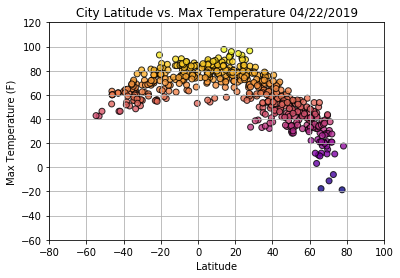

In [6]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Temperature (F)"], c=new_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

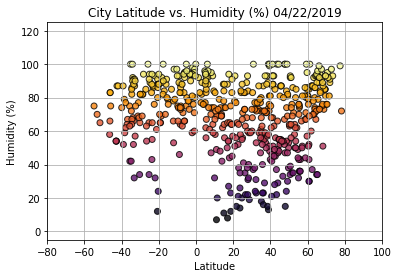

In [7]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Humidity (%)"], c=new_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='inferno', alpha=0.8, label="City")

# Graph Properties
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

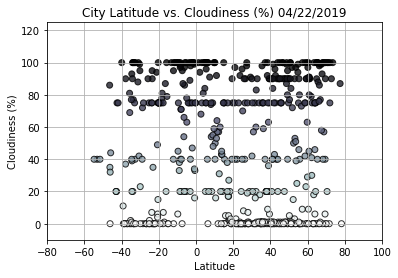

In [8]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Cloudiness (%)"], c=new_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

#Graph Properties
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

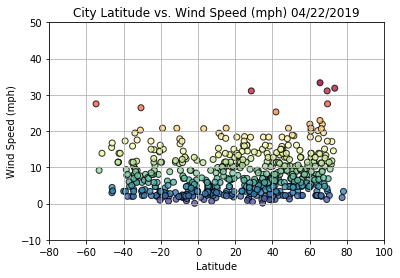

In [9]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Wind Speed (mph)"], c=new_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Wind Properties
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()